In [1]:
%matplotlib inline
import random as r
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy
import scipy.stats as st
from sklearn.preprocessing import normalize, scale


In [2]:
### The base functions ###
def trade(m_i,m_j):
    '''
    epsilon is a percentage of change, [0,1] occurring between each trade.
    m_i and m_j are participating agents stored as a float representing their wealth.
    returns m_i_prime and m_j_prime, the wealth of each agent post-transaction
    '''
    epsilon = r.uniform(0,1)
    m_i_prime = epsilon*(m_i+m_j)
    m_j_prime = (1-epsilon)*(m_i+m_j)

    #ensure that nobody has negative wealth value post-transaction
    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        m_i_prime = epsilon*(m_i+m_j)
        m_j_prime = (1-epsilon)*(m_i+m_j)
        
    delta_m = epsilon*m_j

    return m_i_prime, m_j_prime

def trade_with_savings(m_i,m_j,l):
    m_i_prime = -1
    m_j_prime = -1

    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        m_i_prime = l*m_i + epsilon*(1-l)*(m_i+m_j)
        m_j_prime = l*m_j + (1-epsilon)*(1-l)*(m_i+m_j)
        

    return m_i_prime, m_j_prime

def iterate(n_transactions, agent_list, savings = 0.0, nearest_prob = 1.0, trade=trade):
    '''
    n_transactions = number of transactions for each cycle
    agent_list = initial 'pool' of agents, each with a specified starting wealth
    n_agents = number of agents in each list
    function sequence: 
    choose 2 agents with nonzero wealth to trade -> 
    transfer wealth -> 
    update wealth -> 
    repeat for n_transactions
    '''
    if savings != 0.0:
        trade = trade_with_savings
        
        
    n_agents = len(agent_list)
    agent_set = set(np.arange(0,n_agents))
    for t in range(n_transactions):
        i1, i2 = r.sample(agent_set,2)
        agent1, agent2 = agent_list[i1], agent_list[i2]
        #ensure transactions between nonzero wealth
        while agent1 < 0 or agent2 < 0:
            i1, i2 = r.sample(agent_set,2)
            agent1, agent2 = agent_list[i1], agent_list[i2]
        agent1_prime, agent2_prime = trade(agent1, agent2)
        
        #savings parameter
        #agent1_prime += savings*agent1 + (1-savings)*agent1
        #agent2_prime += savings*agent2 + (1-savings)*agent2
        #update agent wealth value
        agent_list[i1], agent_list[i2] = agent1_prime, agent2_prime
        
    return agent_list

def plot_fit(x,fit):
    plt.plot(x,fit)
    plt.xlabel("Range of wealth")
    plt.ylabel("1/wealth, W_n")
    plt.title("Gibbs Distribution")

def gaussian_fit(distribution,bins):
    mu, sigma = scipy.mean(distribution), scipy.std(distribution)
    y = mlab.normpdf(bins,mu,sigma)
    #bars, bins, patches = plt.hist(distribution, 50,normed=True)
    return y

def power_fit(distribution, beta):
#     w_arr = []
#     x = np.linspace(0,max(distribution))
#     for m in x:
#         wn = beta*np.exp(-m*beta)
#         w_arr.append(wn)

    w_arr = []
    x = np.linspace(0,max(distribution))
    for m in x:
        wn = beta*np.exp(-m*beta)
        w_arr.append(wn)
    return x, w_arr

In [3]:
'''Initialize'''
alpha = 1
n_agents = 1000
transactions = 10**6
money = 1.0
beta = 1/money
m_0 = money*n_agents
initial_agent_list = np.full(n_agents,money)

'''Iterate'''
wealth_distribution = iterate(transactions, initial_agent_list)
np.savetxt('wealth_distribution_base.txt', wealth_distribution)

In [4]:
'''Write to file'''
outfile = open("wealth_distribution_base.txt", "w")
outfile.write(str(wealth_distribution))

17250

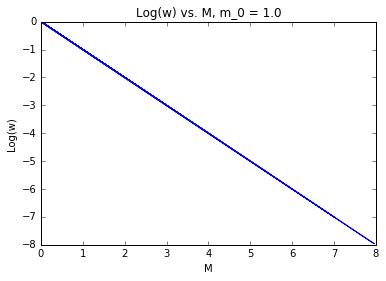

In [5]:
'''Log(w) as a function of wealth'''
w_array = beta*np.exp(-beta*wealth_distribution)
logw_array = np.log(w_array)
plt.plot(wealth_distribution,logw_array)
plt.xlabel("M")
plt.ylabel("Log(w)")
plt.title("Log(w) vs. M, m_0 = 1.0")    

(8566106.9416557364, -13108132.925721642, 13108132.925928069)


C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2225: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


NameError: name 'dist_name' is not defined

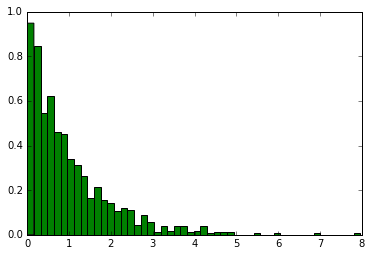

In [6]:
# # attempt 2 from https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

# #y = scipy.int_(scipy.round_(scipy.stats.vonmises.rvs(5,size=size)*47))
# y = wealth_distribution
# #y = [float(i)/max(wealth_distribution) for i in wealth_distribution]

# #h = plt.hist(y, bins = n_agents // 20, color='g')
# h = plt.hist(y, bins = n_agents // 20, color='g', normed=True)

# #print(h[0])
# #print(h[1])
# #x = np.arange(0,max(h[1]))
# #x = h[1]
# x = scipy.arange(n_agents // 20)
# #print(x,y)
# #print(h)
# dist = st.pareto
# param = dist.fit(y)
# print(param)
# loc = param[-2]
# scale = param[-1]
# pdf_fitted = dist.pdf(x, *param[:-2], loc=loc-1, scale=scale) * 3
# plt.plot(pdf_fitted, label=dist_name)
# plt.xlim(0,max(wealth_distribution))
# plt.legend(loc='upper right')
# plt.show()

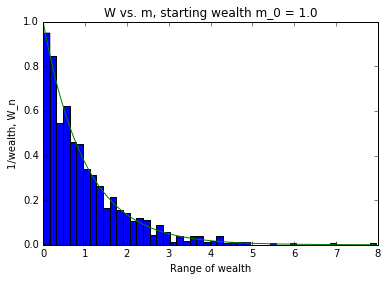

In [7]:
from scipy.stats import pareto

bars, bins, patches = plt.hist(wealth_distribution, 50, normed=True)
x = np.linspace(0, max(wealth_distribution),n_agents)
#b, loc, scale = 1, 1, 1
#loc = mean, scale = stdev
#fit_scipy = scipy.stats.pareto.fit(distribution,beta,loc=money)
#print(fit_scipy)
fit = beta*np.exp(-x*beta)
#print(len(fit),len(x))
#x, fit = power_fit(distribution, beta)
plt.plot(x,fit)
plt.xlabel("Range of wealth")
plt.ylabel("1/wealth, W_n")
plt.title("W vs. m, starting wealth m_0 = {}".format(money))
#plt.plot(x, pareto.pdf(x, beta),'r-', lw=5, alpha=.6, label='pareto pdf')

In [9]:
def iterate_with_savings(n_transactions, agent_list, l):

        
    n_agents = len(agent_list)
    agent_set = set(np.arange(0,n_agents))
    for t in range(n_transactions):
        i1, i2 = r.sample(agent_set,2)
        agent1, agent2 = agent_list[i1], agent_list[i2]
        #ensure transactions between nonzero wealth
        while agent1 < 0 or agent2 < 0:
            i1, i2 = r.sample(agent_set,2)
            agent1, agent2 = agent_list[i1], agent_list[i2]
        agent1_prime, agent2_prime = trade_with_savings(agent1, agent2, l)

        agent_list[i1], agent_list[i2] = agent1_prime, agent2_prime
    return agent_list

        
def trade_with_savings(m_i,m_j,l):
    m_i_prime = -1
    m_j_prime = -1

    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        m_i_prime = l*m_i + epsilon*(1-l)*(m_i+m_j)
        m_j_prime = l*m_j + (1-epsilon)*(1-l)*(m_i+m_j)
        

    return m_i_prime, m_j_prime

In [10]:

'''Trials for varying lambda'''

agent_no = 1000
transactions = 10**6
money = 1.0
beta = 1/money
m_0 = money*agent_no
lambda_lst = np.linspace(0,0.95,20)
#lambda_lst = [0.5]

for l in lambda_lst:
    agents = np.full(agent_no,money)
    wealth_distribution = iterate_with_savings(transactions, agents, l)
    filename = 'wealth_distribution_lambda_'+str(l)+'.txt'
    #print(wealth_distribution)
    np.savetxt(filename, wealth_distribution)
    #x, p_fit = power_fit(agents, beta)
    #counts, bins, patches = plt.hist(agents, 50, normed=True)
    #x, scaled_fit = overlay_fit(distribution,beta, max(counts))
    #plt.title("Distribution of Wealth with {}% savings (lambda = {})".format(100*l,l))
    #plt.xlabel("Wealth")
    #plt.ylabel("Fraction of Distribution")
    #g_fit = gaussian_fit(agents,bins)
    #plt.plot(bins,g_fit, 'r--', linewidth=2)
    #plt.show()

    #plt.plot(scaled_fit,color='red',lw=2)
    #plt.show()


KeyboardInterrupt: 

In [11]:
'''Trials for varying alpha parameter, constant lambda'''
def iterate_nearest_neighbor(runs, agents, a):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction(agent1,agent2,a) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade(agent1,agent2)
        
def consensual_transaction(mi,mj,alpha):
    try:
        roll = r.uniform(0,1)
        p = ((abs(mi-mj))**(-alpha))
        if roll <= p:
            return True
        else:
            return False
    except ZeroDivisionError:
        return False
    
agent_no = 1000
transactions = 10**6
money = 1.0
beta = 1/money
m_0 = money*agent_no
alpha_lst = [0,.5,1.0,1.5,2]
for a in alpha_lst:
    agents = np.full(agent_no,money)
    iterate_nearest_neighbor(transactions, agents, a)
    #distribution = agents
    x, p_fit = power_fit(agents, beta)
    counts, bins, patches = plt.hist(agents, 50, normed=True)
    #x, scaled_fit = overlay_fit(distribution,beta, max(counts))
    plt.title("Distribution of Wealth, a = {}, N = {}".format(a,agent_no))
    plt.xlabel("Wealth")
    plt.ylabel("Fraction of Distribution")
    x, p_fit = power_fit(agents,beta)
    plt.plot(x,p_fit, 'r--', linewidth=2)
    plt.show()

NameError: name 'choose_agents' is not defined

In [ ]:
'''To do: 4d Extract the tail of
the distribution and see if it follows a Pareto distribution
wm ∝ m−1−α
.
'''

# wm = []
# for agent in agents:
#     wm.append(agent**(-1-a))
# print(wm)
# plt.plot(wm)

In [ ]:
'''4e: Factoring In Past Transactions
Alpha is from 1.0 to 2.0
Gamma is from 0.0 to 4.0'''
import pandas as pd

def iterate_nearest_neighbor_past_transactions(n_transactions, agent_list, a, gamma, ledger):
    '''
    n_transactions = number of transactions for each cycle
    agent_list = initial 'pool' of agents, each with a specified starting wealth
    n_agents = number of agents in each list
    function sequence: 
    choose 2 agents with nonzero wealth to trade -> 
    denote c as number of transactions between 2 agents ->
    
    transfer wealth -> 
    update wealth -> 
    repeat for n_transactions
    '''
    n_agents = len(agent_list)
    agent_set = set(np.arange(0,n_agents))
    for t in range(n_transactions):
        #choose agents
        i1, i2 = r.sample(agent_set,2)
        agent1, agent2 = agents[i1], agents[i2]
        c = ledger[i1][i2]
        #verify if transaction is feasible by finding compatible agents
        while valid_transaction(agent1,agent2,a,c,gamma) == False:
            #keep finding compatible agents until transaction conditions are met
            i1, i2 = r.sample(agent_set,2)
            agent1, agent2 = agent_list[i1], agent_list[i2]
            c = ledger[i1][i2]
            
        #trade with agents once we find compatible agents
        agent_list[i1], agent_list[i2] = trade(agent1,agent2)
        ledger[i1][i2] += 1
    return agent_list
        
def valid_transaction(agent1, agent2, a, c, gamma):
    if agent1 <= 0 or agent2 <= 0:
        return False
    try:
        roll = r.uniform(0,1)
        p = ((abs(agent2-agent1))**(-a))*(c+1)**(gamma)
        return roll <= p
    except ZeroDivisionError:
        return False
# def consensual_transaction(mi,mj,alpha,c,gamma):
#     try:
#         roll = r.uniform(0,1)
#         p = ((abs(mi-mj))**(-alpha))*(c+1)**(gamma)
#         return roll <= p
#     except ZeroDivisionError:
#         return False
    
    
alpha_lst = np.arange(0.5,2.0,.1)
gamma_lst = np.arange(0.0,4.0,0.2)
n_agents = 100
ledger = np.zeros((n_agents,n_agents))
transactions = 10**5
money = 1.0
beta = 1/money
m_0 = money*agent_no
wealth_distributions = []
wealth_distributions_rows = []
for a in alpha_lst:
    for g in gamma_lst:
        agents = np.full(n_agents,money)
        wealth_distribution = scale(iterate_nearest_neighbor_past_transactions(transactions, agents, a, g, ledger))
        wealth_distributions_rows.append([wealth_distribution, a, g])
        
        
wealth_distribution_df = pd.DataFrame(wealth_distributions_rows,columns=['distribution','alpha','gamma'])
wealth_distribution_df.to_csv('wealth_distributions_ag.csv')

#lambda_lst = [0.5]




In [ ]:
lines = ['r+','g+','b+','y+','m+','rp','gp','bp','yp','mp']
ag = [(1,0), (1,1), (1,2), (1,3), (1,4), (2,0), (2,1), (2,2), (2,3), (2,4)]
plt.figure(figsize=(10,10))
plt.title("Distribution of wealth with varying alpha and gamma")        
for i in range(len(distributions)):
    fit = distributions[i]
    line = lines[i]
    a, g = ag[i][0], ag[i][1]
    label = "a = {}, g = {}".format(a, g)
    plt.loglog(x,fit,line,label=label)

plt.xlabel('m')
plt.ylabel('P(m)')
plt.xlim(2*10**(2),10**4)
plt.ylim(10**(-10),10**(-2))
plt.legend(loc=0)
plt.show()

In [ ]:
#Taxation model

'''Trials for varying alpha parameter, constant lambda'''

agent_no = 1000
transactions = 10**5
money = 100.0
beta = 1/money
m_0 = money*agent_no
alpha_lst = [0,.5,1.0,1.5,2]
initial_wealth = money*agent_no
tax_rate=0.2
for a in alpha_lst:
    agents = np.full(agent_no,money)
    iterate_nearest_neighbor_with_taxation(transactions, agents, a, tax_rate)
    #distribution = agents
    x, p_fit = power_fit(agents, beta)
    counts, bins, patches = plt.hist(agents, 50, normed=True)
    #x, scaled_fit = overlay_fit(distribution,beta, max(counts))
    plt.title("Distribution of Wealth, a = {}, N = {}".format(a,agent_no))
    plt.xlabel("Wealth")
    plt.ylabel("Fraction of Distribution")
    x, p_fit = power_fit(agents,beta)
    plt.plot(x,p_fit, 'r--', linewidth=2)
    plt.show()
    final_wealth = sum(agents)
    print("initial: {} final: {}".format(initial_wealth,final_wealth))

In [7]:

    
def trade_with_savings(m_i,m_j,l):
    m_i_prime = -1
    m_j_prime = -1

    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        m_i_prime = l*m_i + epsilon*(1-l)*(m_i+m_j)
        m_j_prime = l*m_j + (1-epsilon)*(1-l)*(m_i+m_j)
        

    return m_i_prime, m_j_prime

def transaction_tax(money_exchanged,agents,tax_rate):
    pop = len(agents)
    distributed_money = money_exchanged*tax_rate/pop
    agents = [agent+distributed_money for agent in agents]
    
    return agents

def trade_with_taxation(m_i,m_j,agents,tax_rate):
    m_i_prime = -1
    m_j_prime = -1
    pop = len(agents)
    while m_i_prime < 0 or m_j_prime < 0:
        epsilon = r.uniform(0,1)
        delta_m = epsilon*m_j - (1-epsilon)*m_i
        delta_m, projected_tax = (1-tax_rate)*delta_m, tax_rate*delta_m
        m_i_prime = m_i + delta_m
        m_j_prime = m_j - delta_m
        
    distributed_money = projected_tax/pop
    agents = [agent+projected_tax for agent in agents]    

    return m_i_prime, m_j_prime, agents



def consensual_transaction(mi,mj,alpha):
    try:
        roll = r.uniform(0,1)
        p = ((abs(mi-mj))**(-alpha))
        if roll <= p:
            return True
        else:
            return False
    except ZeroDivisionError:
        return False
    
def consensual_transaction_past_transactions(mi,mj,alpha,c,gamma):
    try:
        roll = r.uniform(0,1)
        p = ((abs(mi-mj))**(-alpha))*(c+1)**(gamma)
        if roll <= p:
            return True
        else:
            return False
    except ZeroDivisionError:
        return False
    

        
def iterate_with_savings(runs, agents, l):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade_with_savings(agent1,agent2,l)
        
def iterate_nearest_neighbor(runs, agents, a):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction(agent1,agent2,a) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade(agent1,agent2)
        
def flat_income_tax(tax_rate, agents):
    bank = 0
    for agent in agents:
        income_tax = tax_rate*agent
        
    
        
        
def iterate_nearest_neighbor_with_taxation(runs, agents, a, tax_rate):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction(agent1,agent2,a) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2], agents = trade_with_taxation(agent1,agent2,agents, tax_rate)
        
def iterate_nearest_neighbor_past_transactions(runs, agents, a, gamma, ledger):
    n = len(agents)
    for t in range(transactions):
        i1, i2 = choose_agents(n)
        agent1, agent2 = agents[i1], agents[i2]
        c = ledger[i1][i2]
        while agent1 < 0 or agent2 < 0 or consensual_transaction_past_transactions(agent1,agent2,a,c,gamma) == False:
            i1, i2 = choose_agents(n)
            agent1, agent2 = agents[i1], agents[i2]
        agents[i1], agents[i2] = trade(agent1,agent2)
        ledger[i1][i2] += 1
        

def power_fit(distribution, beta):
    w_arr = []
    x = np.linspace(0,max(distribution))
    for m in x:
        wn = beta*math.exp(-m*beta)
        w_arr.append(wn)
    return x, w_arr




In [4]:
###Finding fit of distribution
## Attempt 1 from 
## https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python
def make_pdf(dist, params, size=10000):
    """Generate distributions's Propbability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf
import warnings
with warnings.catch_warnings():
    y, x = np.histogram(wealth_distribution, bins = 50, density=True)
    warnings.filterwarnings('ignore')

    # fit dist to data
    params = st.pareto.fit(wealth_distribution)

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Calculate fitted PDF and error with fit in distribution
    pdf = st.pareto.pdf(x, loc=loc, scale=scale, *arg)
    #print(len(y), len(pdf))
    #sse = np.sum(np.power(y - pdf, 2.0))

    # Plot for comparison
    plt.figure(figsize=(12,8))
    #ax = wealth_distribution.plot(kind='hist', bins=50, normed=True, alpha=0.5, color=plt.rcParams['axes.color_cycle'][1])
    ax = plt.hist(wealth_distribution, bins=50, normed=True)
    # Save plot limits
    dataYLim = max(y)

#     # Find best fit distribution
#     best_fit_name, best_fir_paramms = best_fit_distribution(data, 200, ax)
#     st.pareto = getattr(st, best_fit_name)

    # Update plots
    ax.set_ylim(dataYLim)
    ax.set_title('Wealth Distribution')
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Frequency')

    # Make PDF
    pdf = make_pdf(st.pareto, params)

    # Display
    plt.figure(figsize=(12,8))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (st.pareto.shapes + ', loc, scale').split(', ') if st.pareto.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fir_paramms)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title('Wealth Distribution')
    ax.set_xlabel('Wealth')
    ax.set_ylabel('Frequency')

NameError: name 'wealth_distribution' is not defined